In [1]:
#Lasso回归模型
from sklearn.linear_model import Lasso
#效果评估
from sklearn.metrics import r2_score
#机器学习相关的数据集模块
import sklearn.datasets as datasets
#绘图模块
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def super_transfer(_type, value, default_return=0, is_log=False):
    try:
        result = _type(value)
    except:
        result = default_return
        if is_log:
            logger.error('将{value}转换为{_type}类型时失败'.format(value=value, _type=_type))

    return result

def safe_int(value, default_return=0, is_log=False):
    '''
    提供安全的类型转换函数,将value转换为int类型
    :param value:需要被转换的数据
    :param default_return: 转换失败时的返回值
    :param is_log:是否记录日志
    :return:
    '''
    return super_transfer(int, value, default_return, is_log)


def safe_float(value, default_return=0, is_log=False):
    '''
    提供安全的类型转换函数,将value转换为float类型
    :param value:需要被转换的数据
    :param default_return: 转换失败时的返回值
    :param is_log:是否记录日志
    :return:
    '''

    return super_transfer(float, value, default_return, is_log)
import numpy as np
 
def file2array(path, delimiter=','):     # delimiter是数据分隔符
    fp = open(path, 'r', encoding='utf-8')
    string = fp.read()              # string是一行字符串，该字符串包含文件所有内容
    fp.close()
    row_list = string.splitlines()  # splitlines默认参数是‘\n’
    data_list = [[safe_float(i) for i in row.strip().split(delimiter)] for row in row_list]
    return np.array(data_list)
 
data_raw = file2array('bicycle3.csv')
print(data_raw)
print("raw data's shape", data_raw.shape)

[[2.787e+03 0.000e+00 2.000e+00 ... 1.900e+01 7.700e+01 9.600e+01]
 [2.788e+03 0.000e+00 2.000e+00 ... 9.000e+00 5.000e+01 5.900e+01]
 [2.789e+03 0.000e+00 2.000e+00 ... 7.000e+00 4.300e+01 5.000e+01]
 ...
 [8.334e+03 0.000e+00 4.000e+00 ... 9.000e+00 8.000e+01 8.900e+01]
 [8.335e+03 0.000e+00 4.000e+00 ... 2.000e+00 4.700e+01 4.900e+01]
 [8.336e+03 0.000e+00 4.000e+00 ... 6.000e+00 3.100e+01 3.700e+01]]
raw data's shape (833, 17)


In [14]:
#导入datasets模块提供的boston房价数据
#boston = datasets.load_boston()
#data = data_raw[:,0:15]
data = np.linspace(0,832,833)#data_raw[:,0]
data=np.array(data).reshape(-1,1)
target=data_raw[:,0]
target=data_raw[:,16]
#训练长度
l_pre=750
#训练数据
X_train = data[:l_pre]
Y_train = target[:l_pre]
#测试数据
x_test = data[l_pre:]#l_pre+200]
y_true = target[l_pre:]#l_pre+200]

In [15]:
las = Lasso(alpha=0.0000020000)

In [16]:
las.fit(X_train,Y_train)

Lasso(alpha=2e-06)

In [17]:
#输入测试数据
y_pre = las.predict(x_test)

In [18]:
#预测效果评分
r2_score(y_true,y_pre)

-0.07246607006214978

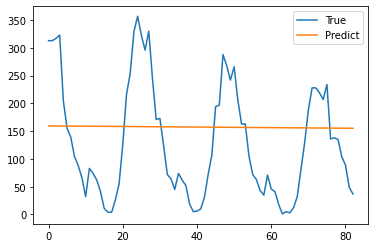

In [19]:
#绘制
plt.plot(y_true,label='True')
plt.plot(y_pre,label='Predict')
plt.legend()

In [23]:
y_pre=pd.DataFrame(y_pre)
y_pre.to_excel('result_bicycle1.xls')

In [22]:
y_true=pd.DataFrame(y_true)
y_true.to_excel('result_bicycle1.xls')

In [31]:
data = data_raw[:,0:14]
target=data_raw[:,15]